In [1]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np

#### Read the dataset

In [2]:
data= pd.read_csv("leukemia.csv")
data.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,88,15091,311,21,-13,215,797,14538,9738,8529,...,1582,185,511,389,793,329,36,191,-37,ALL
1,283,11038,134,-21,-219,116,433,615,115,1518,...,624,169,837,442,782,295,11,76,-14,ALL
2,309,16692,378,67,104,476,1474,5669,3272,3668,...,753,315,1199,168,1138,777,41,228,-41,ALL
3,12,15763,268,43,-148,155,415,4850,2293,2569,...,743,240,835,174,627,170,-50,126,-91,ALL
4,168,18128,118,-8,-55,122,483,1284,2731,316,...,626,156,649,504,250,314,14,56,-25,ALL


In [3]:
print(len(data)) # total no of rows
print(len(data.columns)) # total number of columns

72
5148


In [4]:
data["class"].unique() # unique class values

array(['ALL', 'AML'], dtype=object)

In [6]:
data2 = data.drop('class', axis=1)
data = data.replace('?',np.nan) # replaces the 'None' string to null
data2.isna().values.any() # checking for missing data

False

## Trying Different Normalization Techniques

#### 1.The maximum absolute scaling

In [7]:
# The maximum absolute scaling :- rescaling each feature between -1 and 1 by dividing every observation by its maximum absolute value.
std1 = []
for colm in data2.columns:
    data2[colm] = data2[colm].replace(np.nan,data2[colm].mean()) # puts the mean value of the column in an empty cell
    data2[colm] = data2[colm]/data2[colm].abs().max()
    std1.append(data2[colm].std())

display(data2)

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0.204176,0.259282,0.736967,0.187500,-0.006490,0.123919,0.199499,0.673898,0.572453,0.328013,...,0.427617,0.426760,0.447942,0.309135,0.153937,0.342549,0.296664,0.173913,0.059818,-0.194737
1,0.656613,0.189647,0.317536,-0.187500,-0.109336,0.066859,0.108385,0.028508,0.006760,0.058380,...,0.257238,0.168330,0.409201,0.506352,0.174911,0.337797,0.266005,0.053140,0.023802,-0.073684
2,0.716937,0.286789,0.895735,0.598214,0.051922,0.274352,0.368961,0.262782,0.192346,0.141066,...,0.801782,0.203129,0.762712,0.725348,0.066482,0.491577,0.700631,0.198068,0.071406,-0.215789
3,0.027842,0.270828,0.635071,0.383929,-0.073889,0.089337,0.103880,0.224818,0.134795,0.098800,...,0.341871,0.200432,0.581114,0.505142,0.068856,0.270842,0.153291,-0.241546,0.039461,-0.478947
4,0.389791,0.311462,0.279621,-0.071429,-0.027459,0.070317,0.120901,0.059519,0.160543,0.012153,...,0.198218,0.168870,0.377724,0.392619,0.199446,0.107991,0.283138,0.067633,0.017538,-0.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.327146,0.392042,0.109005,0.232143,-0.101348,0.014409,0.066083,0.004821,-0.009347,0.004615,...,0.247216,0.158619,0.222760,0.321839,0.094579,0.305400,0.319206,-0.106280,0.081428,0.026316
68,0.220418,0.675618,0.172986,0.348214,-0.029955,0.034582,0.076596,0.026376,0.028099,0.005000,...,0.066815,0.180469,0.152542,0.179673,0.141670,0.182721,0.036970,0.000000,0.556530,-0.257895
69,0.338747,0.269557,0.715640,0.223214,-0.104343,0.105476,0.164456,0.174385,0.127212,0.041381,...,0.320713,0.200971,0.314770,0.386570,0.216858,0.349460,0.401262,-0.009662,0.065769,0.084211
70,1.000000,0.714224,0.556872,0.241071,-0.312531,-0.143516,0.119399,-0.007370,-0.043795,-0.032074,...,0.847439,0.236849,0.203390,0.690260,0.077958,0.201296,0.314698,0.000000,0.088945,-0.384211


In [8]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,D86980_at,U41745_at,S66793_at,M21389_at,L42176_at,U03911_at,U40992_at,D16480_at,X81895_at,D45906_at,class
0,-0.430556,-0.527397,0.551198,-0.830827,0.323864,-0.077465,-0.442857,-0.180160,0.490385,-0.127796,ALL
1,0.250000,0.678082,-0.063181,0.248120,-0.244318,-0.042254,0.171429,0.267688,-0.086538,0.049521,ALL
2,0.486111,0.212329,0.185185,-0.082707,-0.914773,0.218310,-0.890476,-0.522976,0.298077,-0.974441,ALL
3,-0.166667,0.226027,0.540305,-0.189850,0.323864,-0.320423,-0.057143,0.264770,0.740385,-1.000000,ALL
4,0.097222,0.794521,-0.453159,0.231203,-0.159091,0.802817,-0.290476,0.782640,-0.105769,0.303514,ALL


C:\Users\shova\AppData\Local\Temp\ipykernel_9884\3147995716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(file.corr(), annot=True)


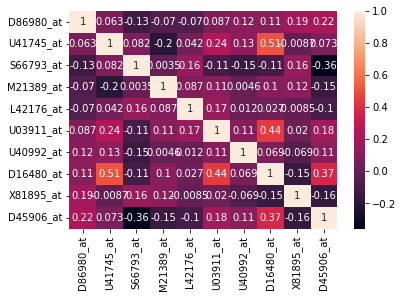

In [9]:
dataplot = sb.heatmap(file.corr(), annot=True)
mp.show()

#### 2.The min-max approach

In [10]:
data = data.replace('?',np.nan) # replaces the 'None' string to null
data2 = data.copy().drop("class",axis=1).astype(float)
std1 = []
for colm in data2.columns: #rescales the feature to a ? hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
    data2[colm] = data2[colm].replace(np.nan,data2[colm].mean()) # puts the mean value of the column in an empty cell
    data2[colm] = (data2[colm]-data2[colm].min())/(data2[colm].max()-data2[colm].min())
    std1.append(data2[colm].std())

display(data2)

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0.265525,0.166499,0.857143,0.502732,0.454693,0.233871,0.171073,0.677264,0.590392,0.348897,...,0.397421,0.402418,0.515924,0.268886,0.161897,0.322954,0.322328,0.754658,0.079423,0.570896
1,0.683084,0.088141,0.629344,0.273224,0.398972,0.183972,0.076724,0.038536,0.048434,0.087643,...,0.218054,0.133015,0.481953,0.477593,0.182673,0.318060,0.292789,0.677019,0.044158,0.656716
2,0.738758,0.197452,0.943372,0.754098,0.486340,0.365423,0.346553,0.270392,0.226233,0.167760,...,0.791325,0.169291,0.791932,0.709347,0.075265,0.476423,0.711555,0.770186,0.090770,0.555970
3,0.102784,0.179491,0.801802,0.622951,0.418177,0.203629,0.072058,0.232820,0.171097,0.126807,...,0.307151,0.166479,0.632696,0.476312,0.077617,0.249110,0.184188,0.487578,0.059491,0.369403
4,0.436831,0.225215,0.608752,0.344262,0.443332,0.186996,0.089684,0.069227,0.195765,0.042853,...,0.155920,0.133577,0.454352,0.357234,0.206978,0.081406,0.309296,0.686335,0.038025,0.615672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.379015,0.315888,0.516088,0.530055,0.403300,0.138105,0.032919,0.015093,0.033003,0.035549,...,0.207503,0.122891,0.318471,0.282330,0.103097,0.284698,0.344049,0.574534,0.100583,0.727612
68,0.280514,0.634986,0.550837,0.601093,0.441980,0.155746,0.043805,0.036425,0.068878,0.035922,...,0.017585,0.145669,0.256900,0.131882,0.149745,0.158363,0.072111,0.642857,0.565777,0.526119
69,0.389722,0.178060,0.845560,0.524590,0.401677,0.217742,0.134785,0.182907,0.163832,0.071173,...,0.284877,0.167042,0.399151,0.350832,0.224226,0.330071,0.423110,0.636646,0.085250,0.768657
70,1.000000,0.678428,0.759331,0.535519,0.288883,0.000000,0.088129,0.003028,0.000000,0.000000,...,0.839390,0.204443,0.301486,0.672215,0.086633,0.177491,0.339705,0.642857,0.107942,0.436567


In [11]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,X17042_at,X69654_at,AC002115_cds3_at,D86980_at,U73379_at,L19779_at,D88270_at,M84332_at,M35878_at,L06797_s_at,class
0,0.013127,0.789334,0.607898,0.288732,0.449704,0.202060,0.200078,0.348794,0.412621,0.589657,ALL
1,0.312397,0.141727,0.331453,0.633803,0.121499,0.201283,0.027536,0.792620,0.000000,0.255862,ALL
2,0.034913,0.468295,0.933709,0.753521,0.638264,0.096536,0.064740,0.862090,0.864887,0.196552,ALL
3,0.032726,0.415314,0.531735,0.422535,1.000000,0.128844,0.484816,0.306329,0.070388,0.299452,ALL
4,0.723701,0.024216,0.179126,0.556338,0.485602,0.130399,0.338541,0.277675,0.091424,0.477974,ALL


C:\Users\shova\AppData\Local\Temp\ipykernel_9884\3147995716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(file.corr(), annot=True)


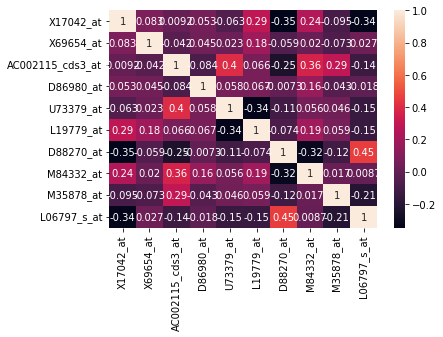

In [12]:
dataplot = sb.heatmap(file.corr(), annot=True)
mp.show()

#### 3.Z score normalization

In [13]:
data = data.replace('?',np.nan) # replaces the 'None' string to null
data2 = data.copy().drop("class",axis=1).astype(float)
std1 = []
for colm in data2.columns:
    data2[colm] = data2[colm].replace(np.nan,data2[colm].mean()) # puts the mean value of the column in an empty cell
    data2[colm] = (data2[colm] - data2[colm].mean())/(data2[colm].std())
    std1.append(data2[colm].std())
display(data2)

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.905824,-0.929756,1.321406,0.045100,0.234794,0.195417,0.242731,2.543874,2.472611,1.782014,...,0.425951,1.011579,0.102543,-0.514763,0.019007,0.027578,0.121334,0.588985,-0.388650,-0.159994
1,0.837052,-1.302184,-0.066544,-0.957702,-0.222823,-0.199181,-0.369010,-0.414397,-0.405905,-0.002910,...,-0.422255,-0.471096,-0.067427,0.551561,0.159027,0.003201,-0.043314,0.031879,-0.572969,0.412253
2,1.069436,-0.782640,1.846788,1.143406,0.494704,1.235721,1.380503,0.659445,0.538444,0.544457,...,2.288679,-0.271445,1.483553,1.735638,-0.564852,0.792121,2.290824,0.700407,-0.329348,-0.259515
3,-1.585099,-0.868006,0.984220,0.570377,-0.065101,-0.043734,-0.399261,0.485429,0.245597,0.264663,...,-0.000924,-0.286922,0.686816,0.545019,-0.549001,-0.340289,-0.648641,-1.327461,-0.492831,-1.503531
4,-0.190798,-0.650687,-0.192008,-0.647311,0.141494,-0.175266,-0.284980,-0.272253,0.376616,-0.308926,...,-0.716079,-0.468000,-0.205528,-0.063374,0.322825,-1.175747,0.048695,0.098732,-0.605025,0.138569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.432119,-0.219725,-0.756598,0.164481,-0.187280,-0.561893,-0.653033,-0.522971,-0.487867,-0.358826,...,-0.472150,-0.526812,-0.885410,-0.446073,-0.377277,-0.163004,0.242400,-0.703502,-0.278059,0.884979
68,-0.843259,1.296913,-0.544877,0.474872,0.130387,-0.422388,-0.582447,-0.424171,-0.297322,-0.356280,...,-1.370251,-0.401450,-1.193481,-1.214742,-0.062892,-0.792367,-1.273338,-0.213248,2.153349,-0.458558
69,-0.387430,-0.874806,1.250832,0.140604,-0.200609,0.067870,0.007446,0.254257,0.207010,-0.115438,...,-0.106257,-0.283827,-0.481730,-0.096084,0.439068,0.063035,0.683077,-0.257816,-0.358198,1.158662
70,2.159851,1.503389,0.725450,0.188357,-1.126952,-1.654013,-0.295063,-0.578852,-0.663156,-0.601704,...,2.515977,-0.077986,-0.970395,1.545924,-0.488237,-0.697076,0.218187,-0.213248,-0.239592,-1.055685


In [14]:
def most_influence(data2,std1):
    s=[]
    cols = []
    for v in std1:
        s.append(v)
    s.sort(reverse=True)
    limit = int(input("Enter number:"))
    for i in range(limit):
        cols.append(data2.columns[std1.index(s[i])])
        i+=1
    return(cols)
most_imp = most_influence(data2,std1)
file = pd.DataFrame()
for c in most_imp:
    file[c]=list(data2[c])
file["class"] = list(data["class"])
file.head()

,AB000114_at,class
0,0.618260,ALL
1,-0.147165,ALL
2,-0.867565,ALL
3,0.453168,ALL
4,-0.222207,ALL
